In [1]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.12

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 1.7 MB 24.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 58 kB 6.7 MB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=6898d0b7252bb96439fd3b20a33aedeee6f3f46af98bb0933decf5543217ce95
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [3]:
!kaggle competitions download -c tensorflow-great-barrier-reef

100% 14.2G/14.2G [05:27<00:00, 98.7MB/s]
100% 14.2G/14.2G [05:27<00:00, 46.5MB/s]


In [4]:
!unzip /content/tensorflow-great-barrier-reef.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/train_images/video_2/4303.jpg  
  inflating: /content/data/train_images/video_2/4304.jpg  
  inflating: /content/data/train_images/video_2/4305.jpg  
  inflating: /content/data/train_images/video_2/4306.jpg  
  inflating: /content/data/train_images/video_2/4307.jpg  
  inflating: /content/data/train_images/video_2/4308.jpg  
  inflating: /content/data/train_images/video_2/4309.jpg  
  inflating: /content/data/train_images/video_2/431.jpg  
  inflating: /content/data/train_images/video_2/4310.jpg  
  inflating: /content/data/train_images/video_2/4311.jpg  
  inflating: /content/data/train_images/video_2/4312.jpg  
  inflating: /content/data/train_images/video_2/4313.jpg  
  inflating: /content/data/train_images/video_2/4314.jpg  
  inflating: /content/data/train_images/video_2/4315.jpg  
  inflating: /content/data/train_images/video_2/4316.jpg  
  inflating: /content/data/train_images/video_2/4317.jpg  
  infl

In [5]:
!git clone https://github.com/ultralytics/yolov5  # clone
!cd yolov5
!pip install -r /content/yolov5/requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 10628, done.
remote: Total 10628 (delta 0), reused 0 (delta 0), pack-reused 10628
Receiving objects: 100% (10628/10628), 10.85 MiB | 27.02 MiB/s, done.
Resolving deltas: 100% (7338/7338), done.
     |████████████████████████████████| 596 kB 28.1 MB/s            
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
import pandas as pd
import numpy
import cv2
from IPython.display import display
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv("/content/data/train.csv", index_col="image_id")
train.head(10)

,video_id,sequence,video_frame,sequence_frame,annotations
image_id,,,,,
0-0,0,40258,0,0,[]
0-1,0,40258,1,1,[]
0-2,0,40258,2,2,[]
0-3,0,40258,3,3,[]
0-4,0,40258,4,4,[]
0-5,0,40258,5,5,[]
0-6,0,40258,6,6,[]
0-7,0,40258,7,7,[]
0-8,0,40258,8,8,[]


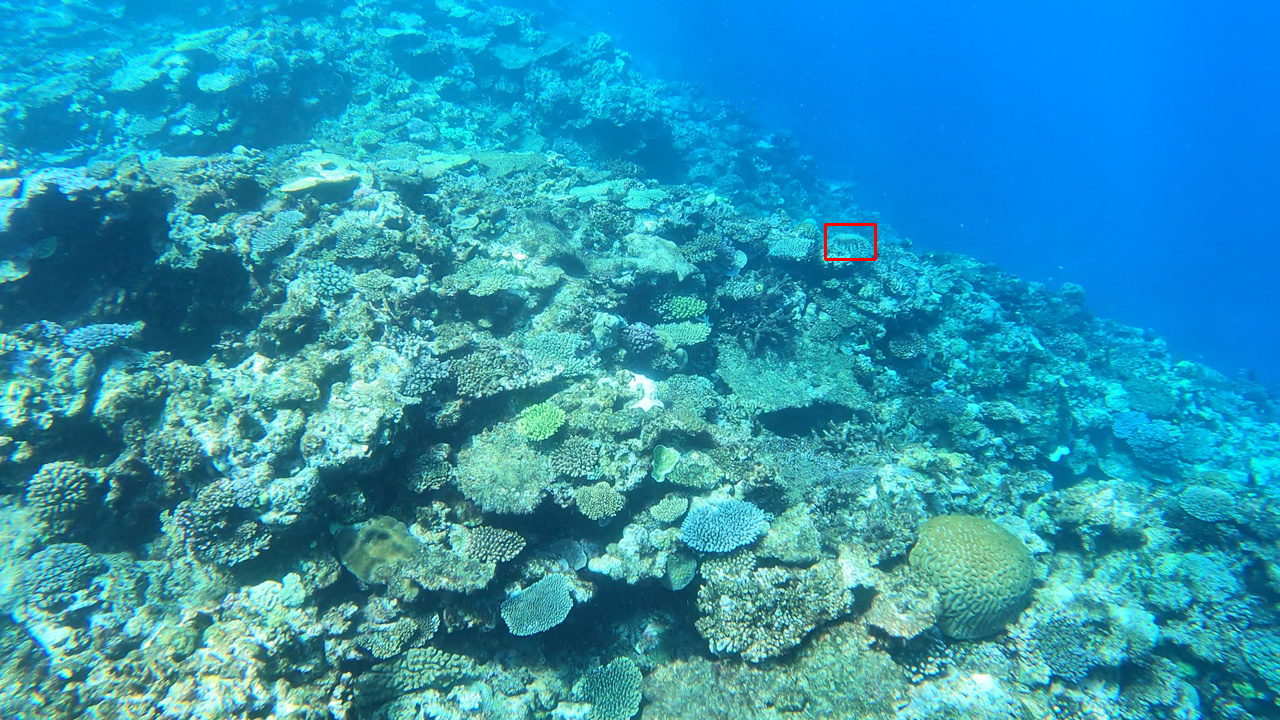

In [8]:
img = cv2.imread("/content/data/train_images/video_0/978.jpg")
from google.colab.patches import cv2_imshow

start_pt = (825, 224)
end_pt = (875, 259)
color = (0, 0, 255)
thickness = 2
image = cv2.rectangle(img, start_pt, end_pt, color, thickness)
cv2_imshow(image)
print(image.shape)

In [9]:
import os
import ast
!mkdir -p data/text_files
path_to_txt_folder = "/content/data/text_files"
def txt_data(path):
  for folder in os.listdir(path):
    path_to_folder = os.path.join(path, folder)
    _, video_id = folder.split("_")
    path_to_txt = os.path.join(path_to_txt_folder, "text_" + video_id)
    if not os.path.exists(path_to_txt):
      os.mkdir(path_to_txt)
    
    for image in os.listdir(path_to_folder):
      path_to_image = os.path.join(path_to_folder, image)
      
      image_id, _ = image.split(".")
      image_match = video_id + "-" + image_id
      
      img_temp = cv2.imread(path_to_image)
      height, width, channels = img_temp.shape
      
      image_data = train.loc[image_match]
      annotation_list = ast.literal_eval(image_data.annotations)

      if bool(annotation_list) == True:
        path_to_file = os.path.join(path_to_txt, image_id + ".txt")
        file_ = open(path_to_file, "w")
        for i in annotation_list:
          x_min = i['x']
          y_min = i['y']
          box_width = i['width']
          box_height = i['height']
          class_label=str(1)
          x_min = str(round(x_min/width, 10))
          y_min = str(round(y_min/height, 10))
          box_width = str(round(box_width/width, 10))
          box_height = str(round(box_height/height, 10))
          file_.write(class_label+" "+x_min+" "+y_min+" "+box_width+" "+" "+box_height)
        file_.close()

txt_data("/content/data/train_images")

(720, 1280, 3)
